In [1]:
import torch.nn as nn
import torch
from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import torch
print(torch.__version__)
torch.cuda.is_available()

train1 = []
train2 = []
train3 = []
train4 = []

train1_file= 'C:/Users/QUANG/Desktop/train1.csv'


1.8.0


['results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\13.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\15.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\17.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\2.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\3.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\37.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\39.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513\\csv\\40.csv', 'results/prediction_muse/stress\\FUSION_[2021-07-

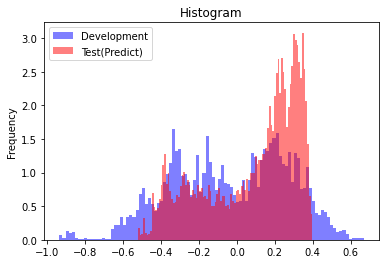

In [43]:
import glob
arousal = 'data/c3_muse_stress/label_segments/arousal/'
valence = 'data/c3_muse_stress/label_segments/valence/'
root_file_valence = 'C:/Users/QUANG/Desktop/label_segments/valence'
root_file_arousal = 'results/prediction_muse/stress/FUSION_[2021-07-30-09-28]_[arousal]_[32_2_False]_[0.001_32]_VAT_0.6513/csv'
partition_file = 'data/c3_muse_stress/metadata/partition.csv'

filenames = glob.glob(glob.escape(root_file_arousal) + "/*")

print(filenames)

hist = []
train= []
val= []
for i in filenames:
    fn = int(i.split('\\')[-1].split('.')[0])
    if fn in [2,3,13,15,17,37,39,40,41,54,56,61,64,67]:
        df =  pd.read_csv(i).iloc[:,2]
        hist.append(df)

for i in (glob.glob(glob.escape(arousal) + "/*")):
    fn = int(i.split('\\')[-1].split('.')[0])
    if fn in [6,7,14,19,21,22,26,27,34,45,51,55,57,70]:
        df =  pd.read_csv(i).iloc[:,2]
        val.append(df)
    elif fn not in [2,3,13,15,17,37,39,40,41,54,56,61,64,67]:
        df =  pd.read_csv(i).iloc[:,2]
        train.append(df)
kwargs = dict(alpha=0.5, bins=100, density=False, stacked=True)

hist= pd.concat(hist,axis=0, ignore_index=True)
train= pd.concat(train,axis=0, ignore_index=True)
val= pd.concat(val,axis=0, ignore_index=True)

plt.hist(val, **kwargs, color='b', label='Development')
plt.hist(hist, **kwargs, color='r', label='Test(Predict)')

plt.gca().set(title='Histogram', ylabel='Frequency')